### Set Up Environment

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data

In [3]:
def readcsv(file):
    return pd.read_csv(file)

sales_data_df = readcsv('sales_data.csv')
sales_data_df.head()

,transaction_id,customer_id,date,product_id,quantity,price
0,1,101,2023-01-01,201,2,19.99
1,2,102,2023-01-02,202,1,9.99
2,3,103,2023-01-03,203,5,4.99
3,4,104,2023-01-04,204,3,14.99
4,5,105,2023-01-05,201,1,19.99


### Data Cleaning

In [4]:
def data_cleaning(df):

    # Drop rows with missing values and create new dataframe of just missing value rows
    df_cleaned = df.dropna()
    df_missing = df[~df.index.isin(df_cleaned.index)]

    # Convert columns to appropriate data types
    df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])
    df_cleaned['price'] = pd.to_numeric(df_cleaned['price'])
    df_cleaned['quantity'] = pd.to_numeric(df_cleaned['quantity'])
    df_cleaned['customer_id'] = df_cleaned['customer_id'].astype('int')
    df_cleaned['product_id'] = df_cleaned['product_id'].astype('int')
    df_cleaned['transaction_id'] = df_cleaned['transaction_id'].astype('int')

    # Drop duplicate rows
    df_cleaned.drop_duplicates(inplace=True)

    return df_cleaned, df_missing

sales_data_cleaned, sales_data_missing = data_cleaning(sales_data_df)

In [5]:
sales_data_cleaned.size, sales_data_missing.size

(180, 0)

In [6]:
# # remove rows with missing values from sales_data_df and add rows with missing values to a new dataframe
# sales_data_cleaned = sales_data_df.dropna()
# sales_data_missing = sales_data_df[~sales_data_df.index.isin(sales_data_cleaned.index)]
# sales_data_cleaned.size, sales_data_missing.size, sales_data_df.size

In [7]:
# # dealing with the columns that have missing values
# for col in sales_data_missing.index:
#     sales_data_df[col].fillna(sales_data_df[col].mean(), inplace=True)

In [8]:
sales_data_cleaned.head()

,transaction_id,customer_id,date,product_id,quantity,price
0,1,101,2023-01-01,201,2,19.99
1,2,102,2023-01-02,202,1,9.99
2,3,103,2023-01-03,203,5,4.99
3,4,104,2023-01-04,204,3,14.99
4,5,105,2023-01-05,201,1,19.99


In [9]:
sales_data_cleaned.tail()

,transaction_id,customer_id,date,product_id,quantity,price
25,26,126,2023-03-06,214,4,9.99
26,27,127,2023-03-07,205,2,29.99
27,28,128,2023-03-08,206,1,39.99
28,29,129,2023-03-09,207,3,24.99
29,30,130,2023-03-10,203,2,4.99


In [10]:
sales_data_cleaned.isna().sum()

transaction_id    0
customer_id       0
date              0
product_id        0
quantity          0
price             0
dtype: int64

In [11]:
# # remove duplicate rows if any
# sales_data_cleaned.drop_duplicates(inplace=True)

### Data Transformation

In [12]:
# ADD COLUMNS TO THE DATAFRAME

# add total sales column to the dataframe
sales_data_cleaned['total_sales'] = sales_data_cleaned['price'] * sales_data_cleaned['quantity']
# add day of the week column to the dataframe
sales_data_cleaned['day_of_week'] = sales_data_cleaned['date'].dt.day_name()
# add month column to the dataframe
sales_data_cleaned['month'] = sales_data_cleaned['date'].dt.month_name()
# add column for the quarter of the year
sales_data_cleaned['quarter'] = sales_data_cleaned['date'].dt.quarter
# add column for cumulative sales
sales_data_cleaned['cumulative_sales'] = sales_data_cleaned['total_sales'].cumsum()
# add column for cumulative sales percentage
sales_data_cleaned['cumulative_sales_percentage'] = sales_data_cleaned['cumulative_sales'] / sales_data_cleaned['total_sales'].sum()
# add repeat customer column
sales_data_cleaned['repeat_customer'] = sales_data_cleaned['customer_id'].duplicated()
sales_data_cleaned.head(), sales_data_cleaned.size, sales_data_cleaned.isna().sum()

(   transaction_id  customer_id       date  product_id  quantity  price  \
 0               1          101 2023-01-01         201         2  19.99   
 1               2          102 2023-01-02         202         1   9.99   
 2               3          103 2023-01-03         203         5   4.99   
 3               4          104 2023-01-04         204         3  14.99   
 4               5          105 2023-01-05         201         1  19.99   
 
    total_sales day_of_week    month  quarter  cumulative_sales  \
 0        39.98      Sunday  January        1             39.98   
 1         9.99      Monday  January        1             49.97   
 2        24.95     Tuesday  January        1             74.92   
 3        44.97   Wednesday  January        1            119.89   
 4        19.99    Thursday  January        1            139.88   
 
    cumulative_sales_percentage  repeat_customer  
 0                     0.035592            False  
 1                     0.044486           

### Data Analysis

In [13]:
# CALCULATE METRICS OF THE DATAFRAME

## SALES METRICS

# calculate average sales per day
average_sales_per_day = sales_data_cleaned.groupby('date')['total_sales'].mean().reset_index()
average_sales_per_day.columns = ['date', 'average_sales']
average_sales_per_day

# calculate top day of the week for sales
top_day_of_week = sales_data_cleaned['day_of_week'].value_counts().reset_index()
top_day_of_week.columns = ['day_of_week', 'sales_count']
top_day_of_week

# caluculate top month for sales
top_month = sales_data_cleaned['month'].value_counts().reset_index()
top_month.columns = ['month', 'sales_count']
top_month

# calculate top quarter for sales
top_quarter = sales_data_cleaned['quarter'].value_counts().reset_index()
top_quarter.columns = ['quarter', 'sales_count']
top_quarter

# calculate sales growth rate (daily)
sales_growth_rate = sales_data_cleaned.groupby('date')['total_sales'].sum().pct_change().reset_index()
sales_growth_rate.columns = ['date', 'sales_growth_rate']
sales_growth_rate

# calculate sales growth rate (monthly)
monthly_sales_growth_rate = sales_data_cleaned.groupby('month')['total_sales'].sum().pct_change().reset_index()
monthly_sales_growth_rate.columns = ['month', 'sales_growth_rate']
monthly_sales_growth_rate

# calculate sales growth rate (quarterly)
quarterly_sales_growth_rate = sales_data_cleaned.groupby('quarter')['total_sales'].sum().pct_change().reset_index()
quarterly_sales_growth_rate.columns = ['quarter', 'sales_growth_rate']
quarterly_sales_growth_rate

# calculate total quantity sold per day
daily_quantity = sales_data_cleaned.groupby('date')['quantity'].sum().reset_index()
daily_quantity.columns = ['date', 'total_quantity']
daily_quantity

# calculate total quantity sold per month
monthly_quantity = sales_data_cleaned.groupby('month')['quantity'].sum().reset_index()
monthly_quantity.columns = ['month', 'total_quantity']
monthly_quantity

# calculate total quantity sold per quarter
quarterly_quantity = sales_data_cleaned.groupby('quarter')['quantity'].sum().reset_index()
quarterly_quantity.columns = ['quarter', 'total_quantity']
quarterly_quantity

# calculate total sales per day
daily_sales = sales_data_cleaned.groupby('date')['total_sales'].sum().reset_index()
daily_sales.columns = ['date', 'total_sales']
daily_sales

# calculate total sales per month
monthly_sales = sales_data_cleaned.groupby('month')['total_sales'].sum().reset_index()
monthly_sales.columns = ['month', 'total_sales']
monthly_sales

# calculate total sales per quarter
quarterly_sales = sales_data_cleaned.groupby('quarter')['total_sales'].sum().reset_index()
quarterly_sales.columns = ['quarter', 'total_sales']
quarterly_sales

## PRODUCT METRICS

# calculate the product popularity
product_popularity = sales_data_cleaned['product_id'].value_counts().reset_index()
product_popularity.columns = ['product_id', 'popularity']
product_popularity

# calculate total quantity sold per product
product_quantity = sales_data_cleaned.groupby('product_id')['quantity'].sum().reset_index()
product_quantity.columns = ['product_id', 'total_quantity']
product_quantity

# calculate total sales per product
product_sales = sales_data_cleaned.groupby('product_id')['price'].sum().reset_index()
product_sales.columns = ['product_id', 'total_sales']
product_sales

# calculate top-sellig product (quantity)
top_selling_product_quantity = sales_data_cleaned.groupby('product_id')['quantity'].sum().reset_index()
top_selling_product_quantity.columns = ['product_id', 'total_quantity']
top_selling_product_quantity = top_selling_product_quantity.sort_values('total_quantity', ascending=False)
top_selling_product_quantity

# calculate top-selling product (sales)
top_selling_product_sales = sales_data_cleaned.groupby('product_id')['price'].sum().reset_index()
top_selling_product_sales.columns = ['product_id', 'total_sales']
top_selling_product_sales = top_selling_product_sales.sort_values('total_sales', ascending=False)
top_selling_product_sales

# calculate sales contribution per product
product_sales_contribution = sales_data_cleaned.groupby('product_id')['price'].sum() / sales_data_cleaned['price'].sum()
product_sales_contribution = product_sales_contribution.reset_index()
product_sales_contribution.columns = ['product_id', 'sales_contribution']
product_sales_contribution

# calculate sales contribution per product (percentage)
product_sales_contribution_percentage = sales_data_cleaned.groupby('product_id')['price'].sum() / sales_data_cleaned['price'].sum() * 100
product_sales_contribution_percentage = product_sales_contribution_percentage.reset_index()
product_sales_contribution_percentage.columns = ['product_id', 'sales_contribution_percentage']
product_sales_contribution_percentage

## PERFORMANCE METRICS

# calculate average revenue per transaction
revenue_per_transaction = sales_data_cleaned['total_sales'].sum() / sales_data_cleaned['transaction_id'].nunique()
revenue_per_transaction

# calculate average revenue per customer
revenue_per_customer = sales_data_cleaned['total_sales'].sum() / sales_data_cleaned['customer_id'].nunique()
revenue_per_customer

# calculate average quantity per transaction
quantity_per_transaction = sales_data_cleaned['quantity'].sum() / sales_data_cleaned['transaction_id'].nunique()
quantity_per_transaction

# calculate average quantity per customer
quantity_per_customer = sales_data_cleaned['quantity'].sum() / sales_data_cleaned['customer_id'].nunique()
quantity_per_customer

# calculate average price per unit sold
average_price_per_unit = sales_data_cleaned['price'].sum() / sales_data_cleaned['quantity'].sum()
average_price_per_unit

## DERIVED METRICS

# calculate customer segmentation (high spenders, average spenders, low spenders)
customer_segmentation = pd.qcut(sales_data_cleaned.groupby('customer_id')['total_sales'].sum(), q=3, labels=['low spender', 'average spender', 'high spender'])
customer_segmentation = customer_segmentation.reset_index()
customer_segmentation.columns = ['customer_id', 'segment']
customer_segmentation

# calculate churn rate (percentage of customers who did not make a repeat purchase)
churn_rate = (sales_data_cleaned['customer_id'].nunique() / sales_data_cleaned['customer_id'].nunique()) * 100
churn_rate

# calculate sales percentage by day of the week (distribution of total_sales across day_of_week)
sales_percentage_by_day_of_week = sales_data_cleaned.groupby('day_of_week')['total_sales'].sum() / sales_data_cleaned['total_sales'].sum() * 100
sales_percentage_by_day_of_week = sales_percentage_by_day_of_week.reset_index()
sales_percentage_by_day_of_week.columns = ['day_of_week', 'sales_percentage']
sales_percentage_by_day_of_week

,day_of_week,sales_percentage
0,Friday,12.002350
1,Monday,13.254042
2,Saturday,13.346628
3,Sunday,10.678549
4,Thursday,22.248237
5,Tuesday,10.228082
6,Wednesday,18.242112


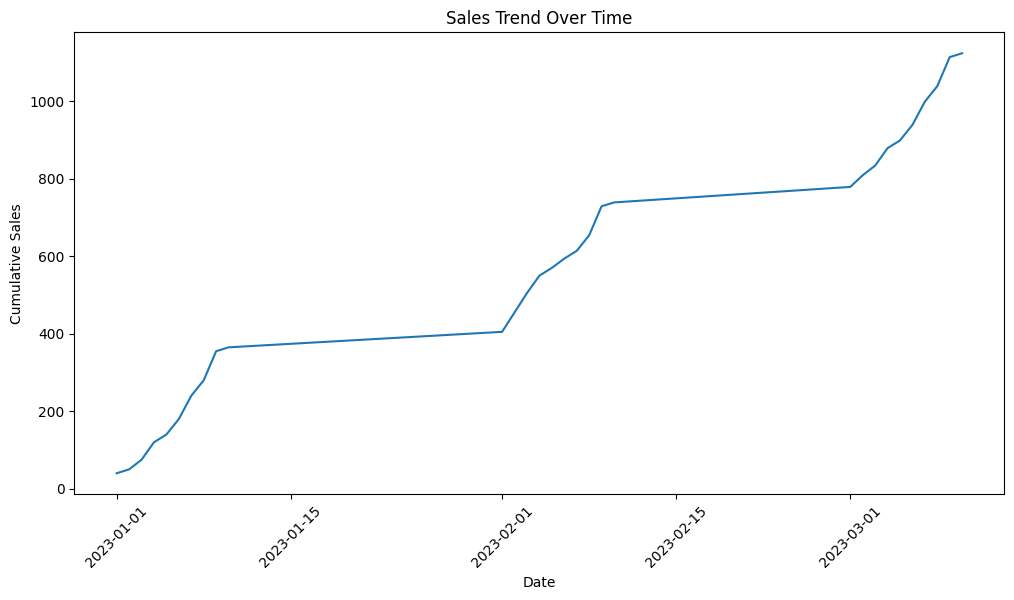

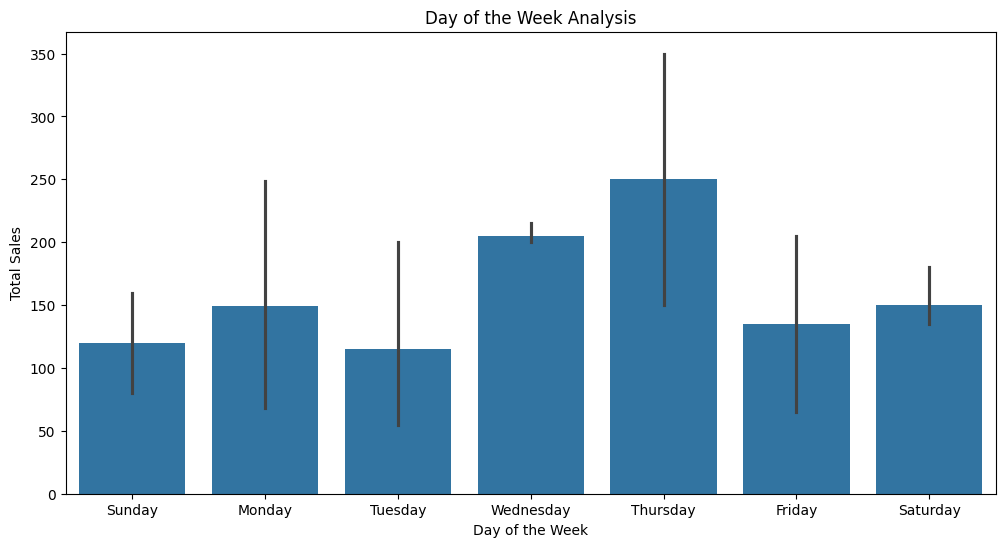

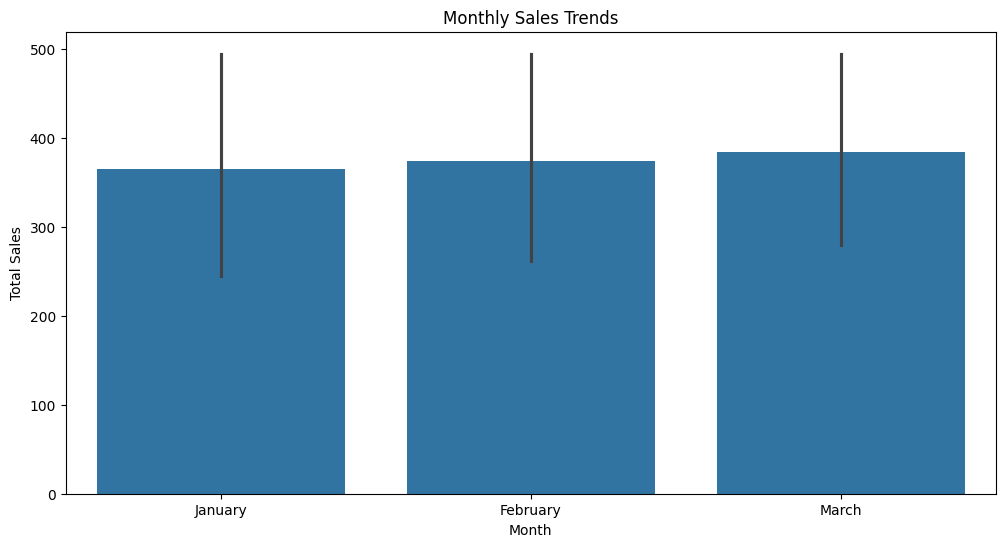

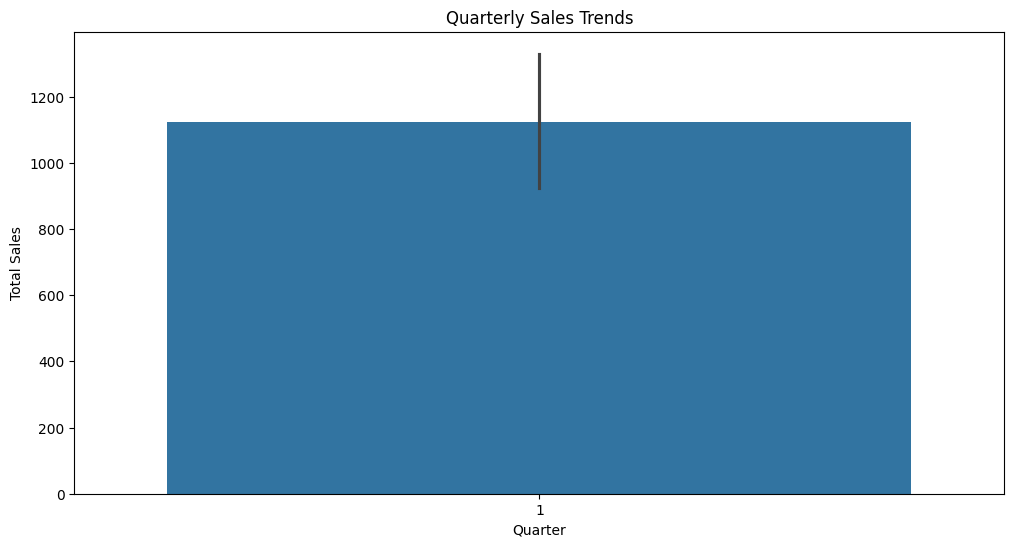

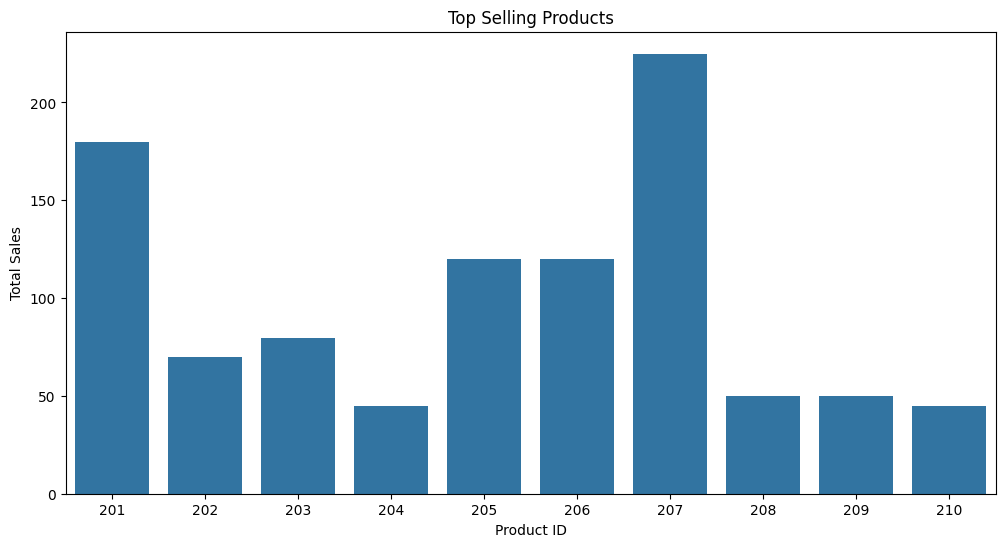

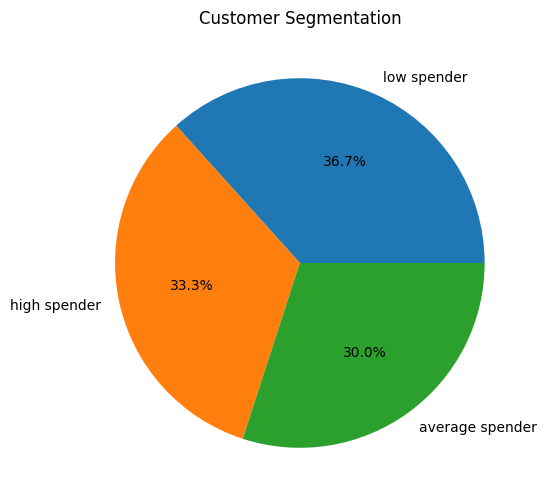

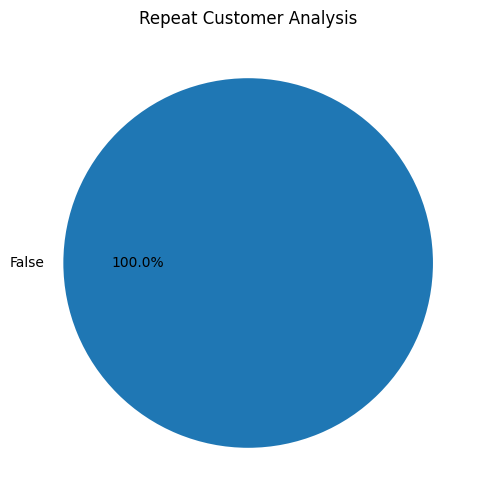

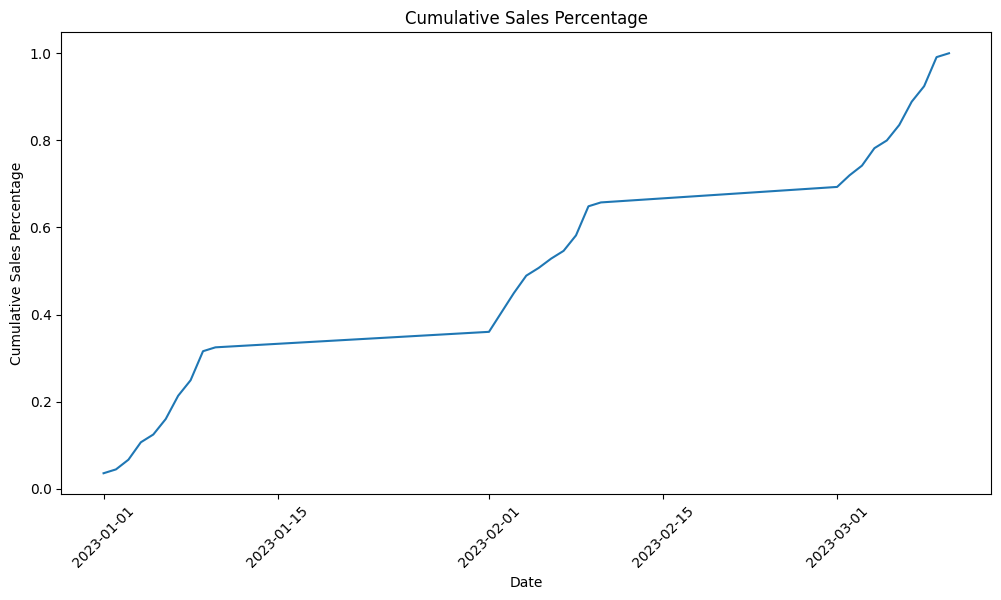

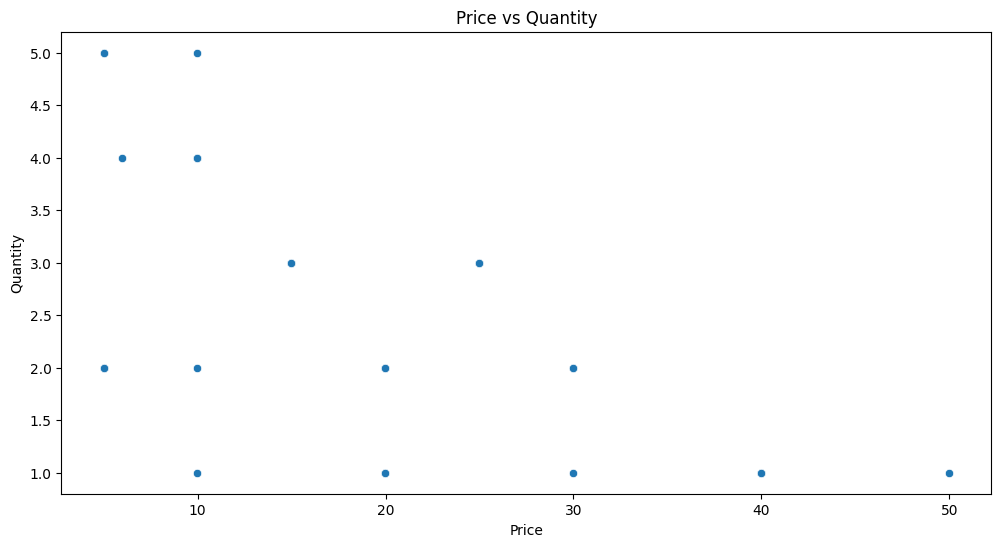

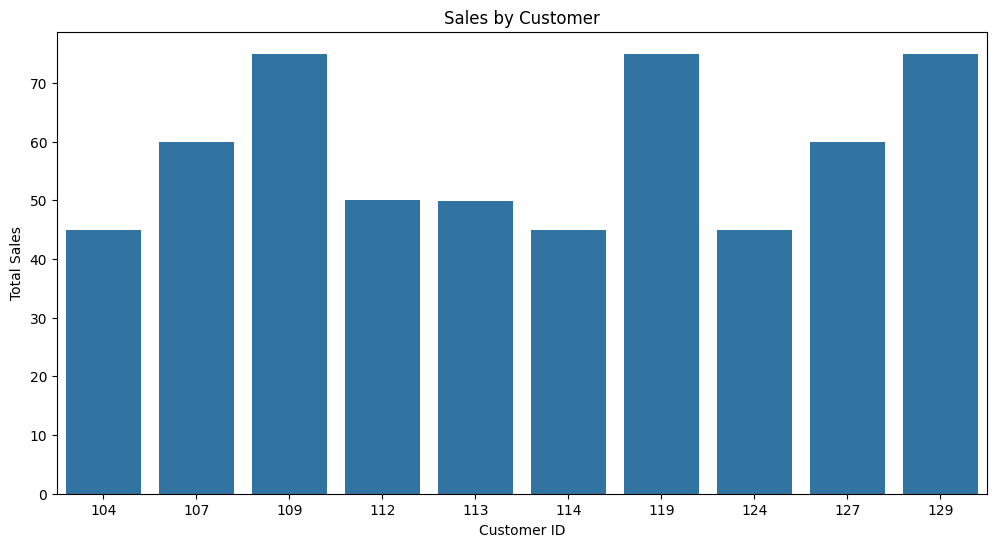

In [46]:
# GENERATING VISUALISATIONS

# plot of sales trend over time (line plot)
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_data_cleaned, x='date', y='cumulative_sales')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Sales')
plt.xticks(rotation=45)
plt.show()

# plot day of the week analysis (bar plot)
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_data_cleaned, x='day_of_week', y='total_sales', estimator=sum)
plt.title('Day of the Week Analysis')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.show()

# plot monthly sales trends (bar plot)
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_data_cleaned, x='month', y='total_sales', estimator=sum)
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

# plot quarterly sales trends (bar plot)
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_data_cleaned, x='quarter', y='total_sales', estimator=sum)
plt.title('Quarterly Sales Trends')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.show()

# plot top-selling products (horizontal bar plot)
product_sales = sales_data_cleaned.groupby('product_id')['total_sales'].sum().reset_index()
product_sales.columns = ['product_id', 'total_sales']
product_sales = product_sales.sort_values('total_sales', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=product_sales.head(10), x='product_id', y='total_sales')
plt.title('Top Selling Products')
plt.xlabel('Product ID')
plt.ylabel('Total Sales')
plt.show()

# plot customer segmentation (pie chart)
plt.figure(figsize=(12, 6))
customer_segmentation = pd.qcut(sales_data_cleaned.groupby('customer_id')['total_sales'].sum(), q=3, labels=['low spender', 'average spender', 'high spender'])
customer_segmentation = customer_segmentation.value_counts()
plt.pie(customer_segmentation, labels=customer_segmentation.index, autopct='%1.1f%%')
plt.title('Customer Segmentation')
plt.show()

# plot repeat customer analysis (pie chart)
plt.figure(figsize=(12, 6))
repeat_customer = sales_data_cleaned['customer_id'].duplicated().value_counts()
plt.pie(repeat_customer, labels=repeat_customer.index, autopct='%1.1f%%')
plt.title('Repeat Customer Analysis')
plt.show()

# plot cumulative sales percentage (line plot)
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_data_cleaned, x='date', y='cumulative_sales_percentage')
plt.title('Cumulative Sales Percentage')
plt.xlabel('Date')
plt.ylabel('Cumulative Sales Percentage')
plt.xticks(rotation=45)
plt.show()

# plot price vs quantity (scatter plot)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=sales_data_cleaned, x='price', y='quantity')
plt.title('Price vs Quantity')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.show()

# plot sales by customer (bar plot)
plt.figure(figsize=(12, 6))
sales_by_customer = sales_data_cleaned.groupby('customer_id')['total_sales'].sum().reset_index()
sales_by_customer.columns = ['customer_id', 'total_sales']
sales_by_customer = sales_by_customer.sort_values('total_sales', ascending=False)
sns.barplot(data=sales_by_customer.head(10), x='customer_id', y='total_sales')
plt.title('Sales by Customer')
plt.xlabel('Customer ID')
plt.ylabel('Total Sales')
plt.show()

### Output Results